# Customer
Grouping customers in various ways to understand their behavior and preferences.

## Importing Libraries

In [15]:
import pandas as pd
import numpy as np
from deds_helpers.common_functions import get_engine, read_data_return_df, drop_sk_datetime_added_columns as drop_columns, \
    plot_unique_clusters, plot_intra_inter_silhouette, plot_cluster_scatter
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.decomposition import PCA

## Connecting to the Database

In [16]:
engine = get_engine()

Connection to UnitedOutdoors database successful


## Reading in the Data

In [17]:
vendor_query = "SELECT * FROM ProductVendor"
vendors = read_data_return_df(vendor_query, engine)

vendors

,PRODUCTVENDOR_sk,PRODUCTVENDOR_PRODUCTVENDOR_ProductID,PRODUCTVENDOR_PRODUCTVENDOR_BusinessEntityID,PRODUCTVENDOR_PRODUCTVENDOR_AverageLeadTime,PRODUCTVENDOR_PRODUCTVENDOR_StandardPrice,PRODUCTVENDOR_PRODUCTVENDOR_LastReceiptCost,PRODUCTVENDOR_PRODUCTVENDOR_LastReceiptDate,PRODUCTVENDOR_PRODUCTVENDOR_MinOrderQty,PRODUCTVENDOR_PRODUCTVENDOR_MaxOrderQty,PRODUCTVENDOR_PRODUCTVENDOR_OnOrderQty,PRODUCTVENDOR_PRODUCTVENDOR_UnitMeasureID,PRODUCTVENDOR_PRODUCTVENDOR_datetime_added
0,1,1997,901,17,47.87,50.2635,2011-08-29,1,5,3.0,12,2024-05-25 08:07:48.627
1,2,1998,834,19,39.92,41.9160,2011-08-29,1,5,3.0,13,2024-05-25 08:07:48.627
2,3,2000,911,17,54.31,57.0255,2011-08-29,1,5,NaN,13,2024-05-25 08:07:48.627
3,4,6,855,19,28.17,29.5785,2011-08-29,100,1000,300.0,16,2024-05-25 08:07:48.627
4,5,6,916,17,25.77,27.0585,2011-08-25,100,1000,NaN,16,2024-05-25 08:07:48.627
...,...,...,...,...,...,...,...,...,...,...,...,...
455,456,1609,833,16,45.99,48.2895,2011-08-27,100,1000,NaN,16,2024-05-25 08:07:48.863
456,457,1615,886,15,59.99,62.9895,2011-08-26,100,1000,NaN,16,2024-05-25 08:07:48.863
457,458,1621,819,17,59.99,62.9895,2011-08-25,100,1000,NaN,16,2024-05-25 08:07:48.863
458,459,1675,854,19,78.89,82.8345,2011-08-29,100,1000,NaN,16,2024-05-25 08:07:48.863


In [18]:
product_query = "SELECT * FROM Product"
products = read_data_return_df(product_query, engine)

products

,PRODUCT_sk,PRODUCT_PRODUCT_ID,PRODUCT_UNITMEASURE_SIZE_ID,PRODUCT_UNITMEASURE_WEIGHT_ID,PRODUCT_PRODUCT_SubCategoryID,PRODUCT_PRODUCTSUBCATEGORY_CategoryID,PRODUCT_PRODUCT_ModelID,PRODUCT_PRODUCTMODELILLUSTRATION_IllustrationID,PRODUCT_PRODUCTPRODUCTPHOTO_PhotoID,PRODUCT_PMPDC_DescriptionID,...,PRODUCT_PRODUCTPHOTO_LargePhotoHexString,PRODUCT_PRODUCTPHOTO_LargePhotoFileName,PRODUCT_PRODUCT_SellStartDate,PRODUCT_DATE_SellStartDateFK,PRODUCT_PRODUCT_SellEndDate,PRODUCT_DATE_SellEndDateFK,PRODUCT_PRODUCT_DiscountedDate,PRODUCT_DATE_DiscountedDateFK,PRODUCT_PRODUCT_Discontinued,PRODUCT_datetime_added
0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,0x474946383961F0009500F70000000000800000008000...,no_image_available_large.gif,2008-04-30,20080430,None,18000101,None,18000101,NaN,2024-05-25 08:05:28.007
1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,0x474946383961F0009500F70000000000800000008000...,no_image_available_large.gif,2008-04-30,20080430,None,18000101,None,18000101,NaN,2024-05-25 08:05:28.007
2,3,3,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,0x474946383961F0009500F70000000000800000008000...,no_image_available_large.gif,2008-04-30,20080430,None,18000101,None,18000101,NaN,2024-05-25 08:05:28.007
3,4,4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,0x474946383961F0009500F70000000000800000008000...,no_image_available_large.gif,2008-04-30,20080430,None,18000101,None,18000101,NaN,2024-05-25 08:05:28.007
4,5,316,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,0x474946383961F0009500F70000000000800000008000...,no_image_available_large.gif,2008-04-30,20080430,None,18000101,None,18000101,NaN,2024-05-25 08:05:28.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,2069,73,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,...,None,None,None,18000101,None,18000101,None,18000101,0.0,2024-05-25 08:06:04.170
2069,2070,74,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,...,None,None,None,18000101,None,18000101,None,18000101,0.0,2024-05-25 08:06:04.170
2070,2071,75,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,None,None,None,18000101,None,18000101,None,18000101,0.0,2024-05-25 08:06:04.170
2071,2072,76,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,None,None,None,18000101,None,18000101,None,18000101,0.0,2024-05-25 08:06:04.170


In [19]:
be_query = "SELECT * FROM BusinessEntity"
business_entities = read_data_return_df(be_query, engine)

business_entities

,BUSINESSENTITY_sk,BUSINESSENTITY_BUSINESSENTITY_BusinessEntityID,BUSINESSENTITY_BUSINESSENTITYCONTACT_PersonID,BUSINESSENTITY_CONTACTTYPE_ContactTypeID,BUSINESSENTITY_CONTACTTYPE_Name,BUSINESSENTITY_datetime_added
0,1,NaN,NaN,1.0,Accounting Manager,2024-05-25 08:06:16.757
1,2,1510.0,1509.0,2.0,Assistant Sales Agent,2024-05-25 08:06:16.757
2,3,1518.0,1517.0,2.0,Assistant Sales Agent,2024-05-25 08:06:16.757
3,4,1522.0,1521.0,2.0,Assistant Sales Agent,2024-05-25 08:06:16.757
4,5,1528.0,1527.0,2.0,Assistant Sales Agent,2024-05-25 08:06:16.757
...,...,...,...,...,...,...
20889,20890,20773.0,NaN,NaN,None,2024-05-25 08:06:23.227
20890,20891,20774.0,NaN,NaN,None,2024-05-25 08:06:23.227
20891,20892,20775.0,NaN,NaN,None,2024-05-25 08:06:23.227
20892,20893,20776.0,NaN,NaN,None,2024-05-25 08:06:23.227


## Data Cleaning

In [20]:
# combining the customers and business entity data
combined_df = pd.merge(vendors, products,
                           left_on='PRODUCTVENDOR_PRODUCTVENDOR_ProductID',
                           right_on='PRODUCT_PRODUCT_ID')

# dropping the datetime_added and sk columns
drop_columns(combined_df)

combined_df

,PRODUCTVENDOR_PRODUCTVENDOR_ProductID,PRODUCTVENDOR_PRODUCTVENDOR_BusinessEntityID,PRODUCTVENDOR_PRODUCTVENDOR_AverageLeadTime,PRODUCTVENDOR_PRODUCTVENDOR_StandardPrice,PRODUCTVENDOR_PRODUCTVENDOR_LastReceiptCost,PRODUCTVENDOR_PRODUCTVENDOR_LastReceiptDate,PRODUCTVENDOR_PRODUCTVENDOR_MinOrderQty,PRODUCTVENDOR_PRODUCTVENDOR_MaxOrderQty,PRODUCTVENDOR_PRODUCTVENDOR_OnOrderQty,PRODUCTVENDOR_PRODUCTVENDOR_UnitMeasureID,...,PRODUCT_PRODUCT_QuantityPerUnit,PRODUCT_PRODUCT_UnitPrice,PRODUCT_PRODUCT_UnitsOnOrder,PRODUCT_PRODUCTCATEGORY_Category,PRODUCT_CATEGORY_Picture,PRODUCT_PRODUCTDESCRIPTION_Desc,PRODUCT_DATE_SellStartDateFK,PRODUCT_DATE_SellEndDateFK,PRODUCT_DATE_DiscountedDateFK,PRODUCT_PRODUCT_Discontinued
0,6,855,19,28.17,29.5785,2011-08-29,100,1000,300.0,16,...,12 - 8 oz jars,25.00,0.0,Condiments,"b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...","Sweet and savory sauces, relishes, spreads, an...",18000101,18000101,18000101,0.0
1,6,916,17,25.77,27.0585,2011-08-25,100,1000,-1.0,16,...,12 - 8 oz jars,25.00,0.0,Condiments,"b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...","Sweet and savory sauces, relishes, spreads, an...",18000101,18000101,18000101,0.0
2,7,855,19,34.38,36.0990,2011-08-29,100,1000,-1.0,16,...,12 - 1 lb pkgs.,30.00,0.0,Produce,"b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...",Dried fruit and bean curd,18000101,18000101,18000101,0.0
3,7,916,17,31.98,33.5790,2011-08-25,100,1000,300.0,16,...,12 - 1 lb pkgs.,30.00,0.0,Produce,"b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...",Dried fruit and bean curd,18000101,18000101,18000101,0.0
4,8,849,19,44.21,46.4205,2011-08-29,100,1000,300.0,16,...,12 - 12 oz jars,40.00,0.0,Condiments,"b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...","Sweet and savory sauces, relishes, spreads, an...",18000101,18000101,18000101,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,74,851,16,37.21,39.0705,2011-08-04,1,5,-1.0,13,...,5 kg pkg.,10.00,20.0,Produce,"b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...",Dried fruit and bean curd,18000101,18000101,18000101,0.0
138,75,893,15,41.21,43.2705,2011-08-07,1,5,-1.0,13,...,24 - 0.5 l bottles,7.75,0.0,Beverages,"b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...","Soft drinks, coffees, teas, beers, and ales",18000101,18000101,18000101,0.0
139,75,851,16,35.21,36.9705,2011-08-04,1,5,-1.0,13,...,24 - 0.5 l bottles,7.75,0.0,Beverages,"b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...","Soft drinks, coffees, teas, beers, and ales",18000101,18000101,18000101,0.0
140,76,893,15,45.28,47.5440,2011-08-07,1,5,-1.0,13,...,500 ml,18.00,0.0,Beverages,"b""\x15\x1c/\x00\x02\x00\x00\x00\r\x00\x0e\x00\...","Soft drinks, coffees, teas, beers, and ales",18000101,18000101,18000101,0.0


In [21]:
# dropping unnecessary columns
columns_to_keep = ['PRODUCTVENDOR_PRODUCTVENDOR_ProductID', 'PRODUCTVENDOR_PRODUCTVENDOR_AverageLeadTime', 'PRODUCTVENDOR_PRODUCTVENDOR_StandardPrice', 'PRODUCTVENDOR_PRODUCTVENDOR_LastReceiptCost', 'PRODUCTVENDOR_PRODUCTVENDOR_MinOrderQty','PRODUCTVENDOR_PRODUCTVENDOR_MaxOrderQty', 'PRODUCTVENDOR_PRODUCTVENDOR_OnOrderQty', 'PRODUCTVENDOR_PRODUCTVENDOR_UnitMeasureID', 'PRODUCT_PRODUCT_UnitPrice']

# converting the string values to integer representations
#combined_df['BUSINESSENTITYADDRESS_ADDRESS_City'] = combined_df['BUSINESSENTITYADDRESS_ADDRESS_City'].astype('category').cat.codes
#combined_df['BUSINESSENTITYADDRESS_ADDRESS_POSTALCODE'] = combined_df['BUSINESSENTITYADDRESS_ADDRESS_POSTALCODE'].astype('category').cat.codes

combined_df = combined_df[columns_to_keep]

combined_df.head()

,PRODUCTVENDOR_PRODUCTVENDOR_ProductID,PRODUCTVENDOR_PRODUCTVENDOR_AverageLeadTime,PRODUCTVENDOR_PRODUCTVENDOR_StandardPrice,PRODUCTVENDOR_PRODUCTVENDOR_LastReceiptCost,PRODUCTVENDOR_PRODUCTVENDOR_MinOrderQty,PRODUCTVENDOR_PRODUCTVENDOR_MaxOrderQty,PRODUCTVENDOR_PRODUCTVENDOR_OnOrderQty,PRODUCTVENDOR_PRODUCTVENDOR_UnitMeasureID,PRODUCT_PRODUCT_UnitPrice
0,6,19,28.17,29.5785,100,1000,300.0,16,25.0
1,6,17,25.77,27.0585,100,1000,-1.0,16,25.0
2,7,19,34.38,36.0990,100,1000,-1.0,16,30.0
3,7,17,31.98,33.5790,100,1000,300.0,16,30.0
4,8,19,44.21,46.4205,100,1000,300.0,16,40.0


## Clustering
Using Kmeans

In [22]:
# Define a range of k values to try, from 2 to the number of data points -1 
ks = range(2, combined_df.shape[0])

# Empty list to store the intra- and inter cluster distances
intra_distances = []
inter_distances = []
silhouette_scores = []

for k in ks:
    # Training the KMeans model for this k value
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(combined_df)
    
    # Calculate the intra cluster distance as the sum of the distances of the samples to their closest cluster center. This is done by kmeans.inertia_
    intra_distance = kmeans.inertia_
    intra_distances.append(intra_distance)
    
    # Calculate the inter cluster distance as the mean distance between the cluster centers. this is done by pairwise_distances(kmeans.cluster_centers_)
    cluster_centers = kmeans.cluster_centers_
    inter_distance = np.mean(pairwise_distances(cluster_centers))
    inter_distances.append(inter_distance)
    
    # calculate the silhouette score
    silhouette_scores.append(silhouette_score(combined_df, kmeans.labels_))

# Create a DataFrame with the results
k_df = pd.DataFrame({'k': ks, 'intra_distance': intra_distances, 'inter_distance': inter_distances, 'silhouette_score': silhouette_scores})
k_df

C:\Users\tjorn\AppData\Local\pypoetry\Cache\virtualenvs\training-HDTswlVV-py3.11\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (139) found smaller than n_clusters (140). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\tjorn\AppData\Local\pypoetry\Cache\virtualenvs\training-HDTswlVV-py3.11\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (139) found smaller than n_clusters (141). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


,k,intra_distance,inter_distance,silhouette_score
0,2,2.671593e+06,569.678586,0.924129
1,3,6.257312e+05,920.382500,0.937223
2,4,5.159325e+05,935.947834,0.807142
3,5,2.229893e+05,879.189658,0.811074
4,6,1.813831e+05,852.505328,0.402818
...,...,...,...,...
135,137,2.102500e-02,271.356249,0.069658
136,138,1.051250e-02,269.832523,0.055953
137,139,0.000000e+00,268.348186,0.042254
138,140,0.000000e+00,266.805632,0.042254


### Plotting the intra and inter cluster distances

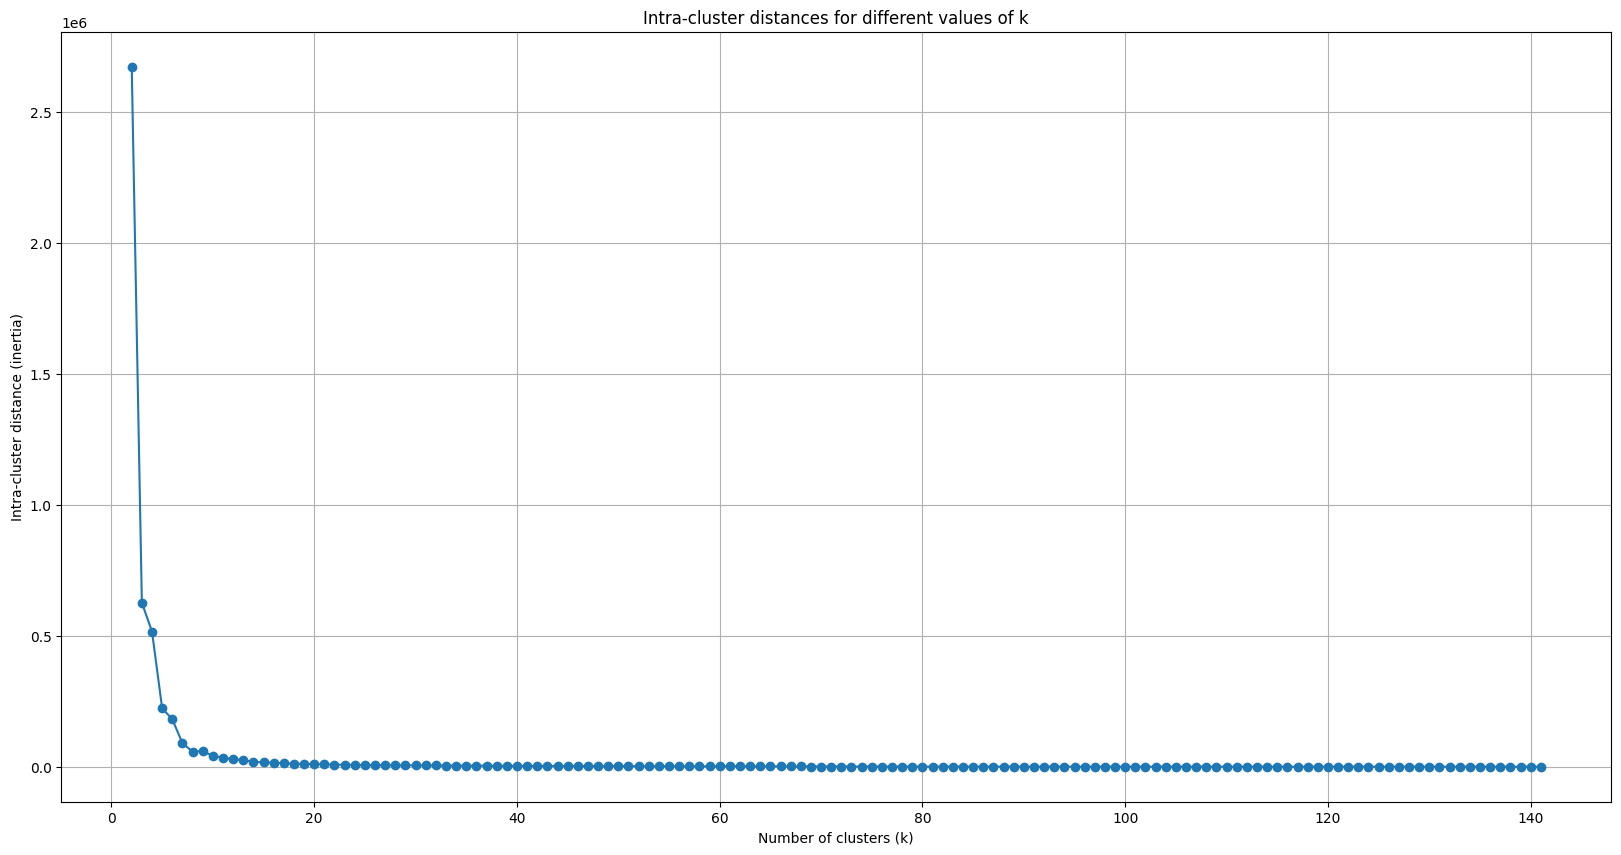

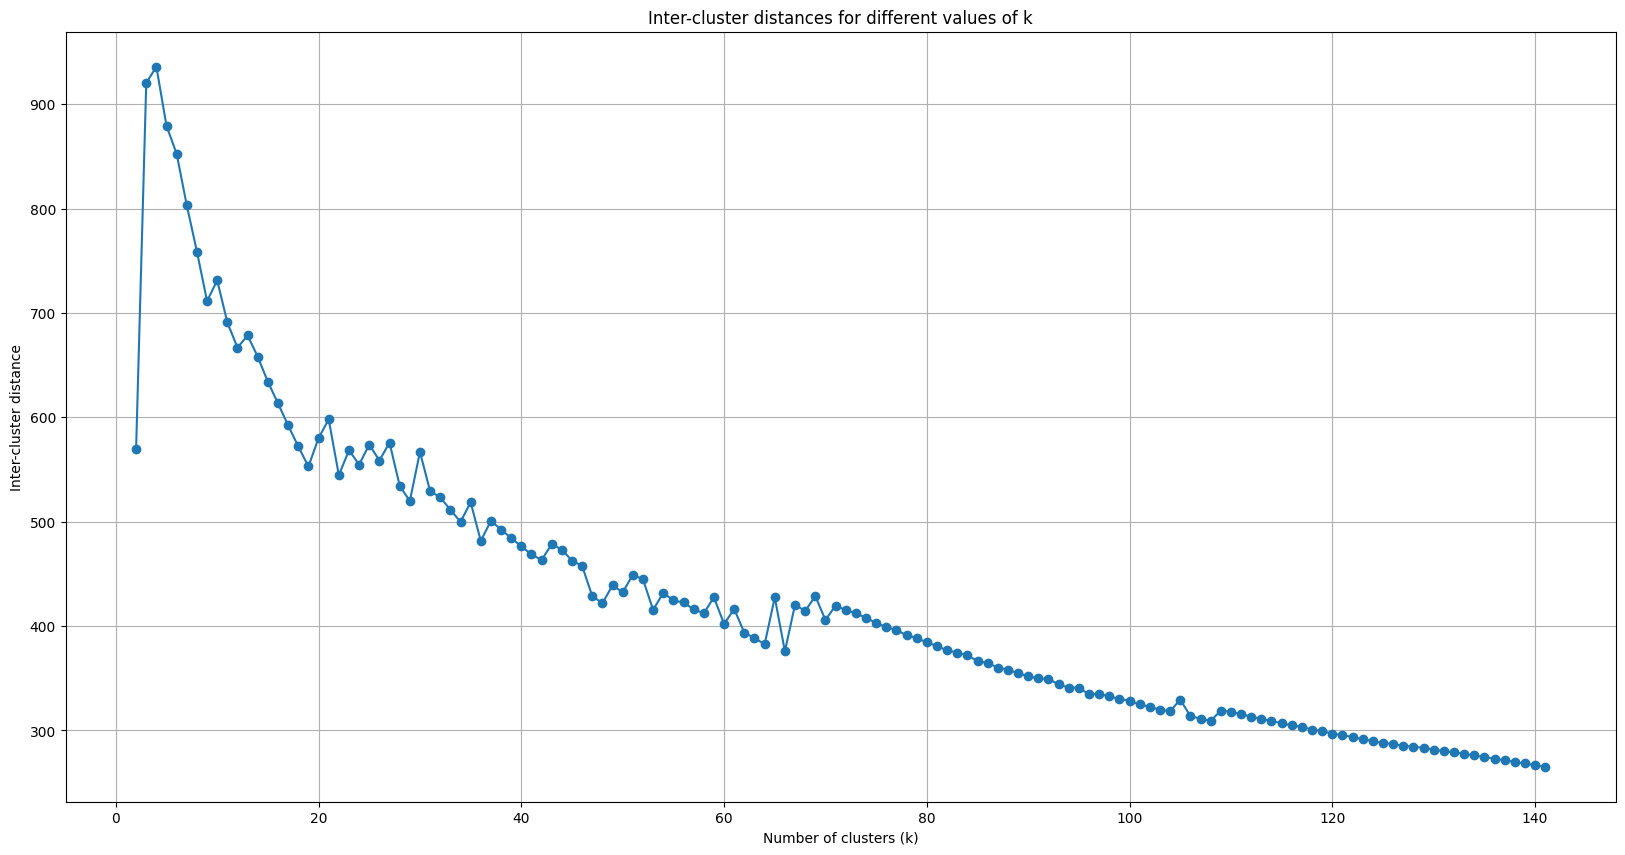

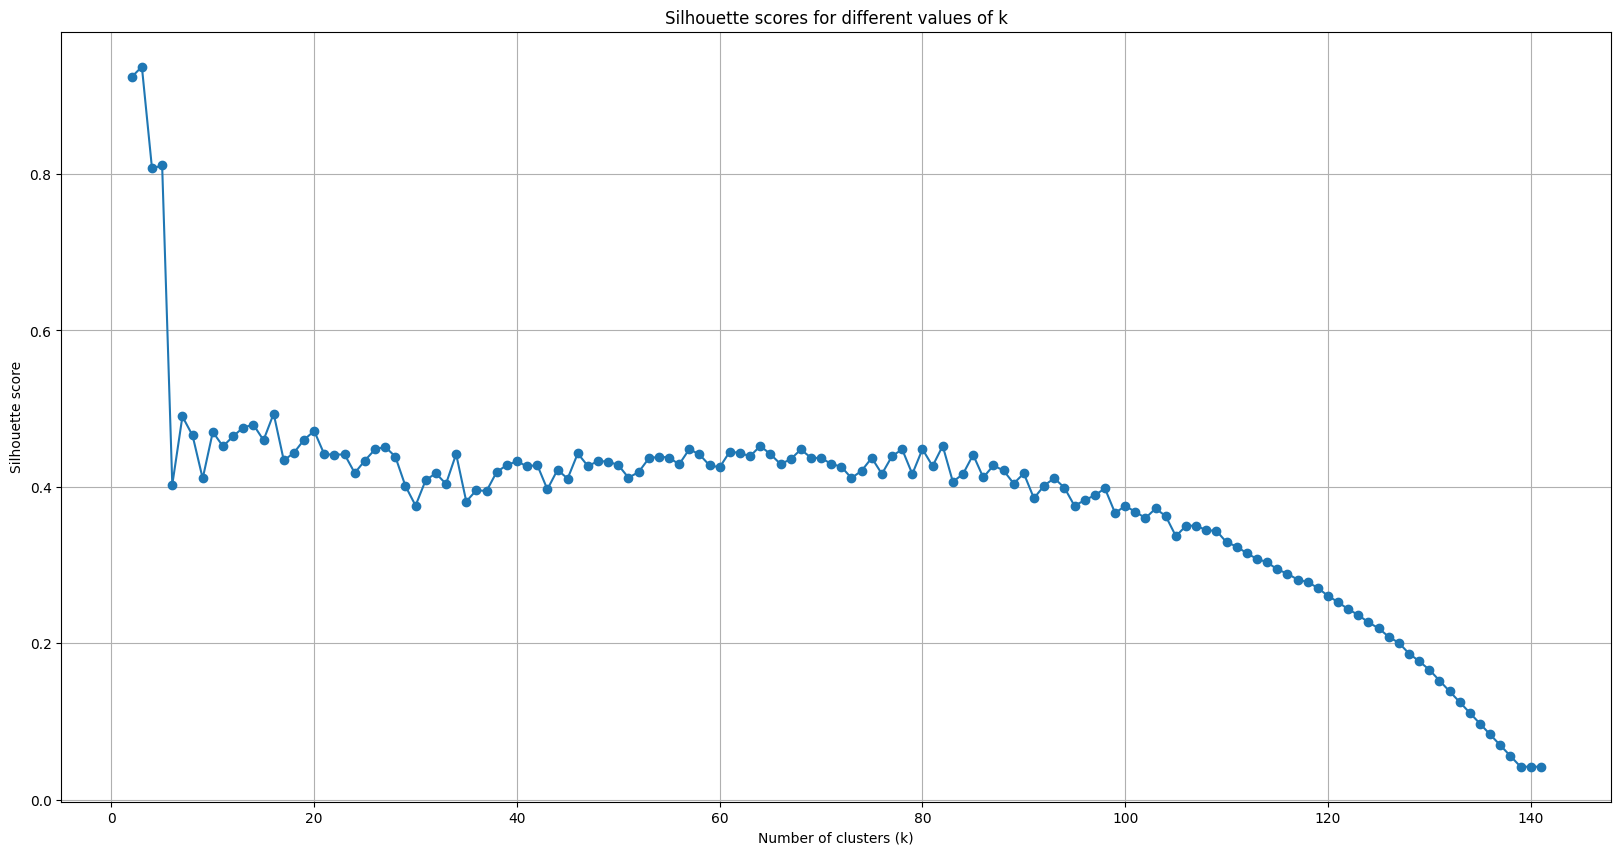

In [23]:
plot_intra_inter_silhouette(ks, intra_distances, inter_distances, silhouette_scores, 'ProductVendor_Cluster')

### Finding the optimal number of clusters

In [24]:
# Gets the index of the maximum silhouette score. Adding 2 because the range of k starts from 2 (since we need at least 2 clusters)
optimal_k = np.argmax(silhouette_scores) + 2

print(f"Optimal number of clusters based on silhouette score: k={optimal_k}")

Optimal number of clusters based on silhouette score: k=3


In [25]:
# Train a KMeans model with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k)
kmeans_optimal.fit(combined_df)

KMeans(n_clusters=3)

### Plotting the clusters

In [26]:
# Defining a list of colors to be used for the clusters
colors = ['deeppink','blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'azure', 'orange', 'brown']

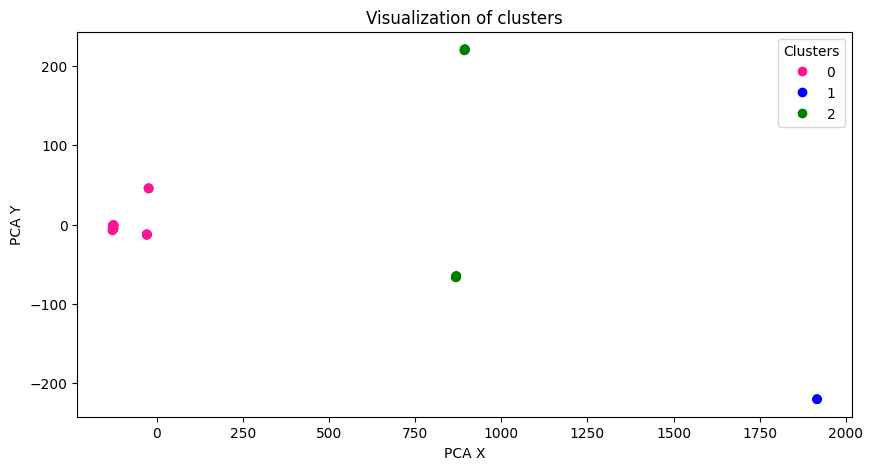

In [27]:
# Get the cluster assignments for each data point
cluster_assignments = kmeans_optimal.labels_

# Reduce the data to two dimensions using PCA
# PCA is a technique that projects the data into a lower dimensional space while preserving as much variance as possible
pca = PCA(n_components=2) # reducing to 2 dimensions
df_pca = pca.fit_transform(combined_df)

# creating a color map using the colors list
color_map = {label: colors[label % len(colors)] for label in np.unique(cluster_assignments)}

# Create a scatter plot of the reduced data, coloring by cluster
plot_cluster_scatter(df_pca, cluster_assignments, color_map, 'ProductVendor_Cluster')

C:\Users\tjorn\PycharmProjects\United-Outdoors\visualization\static\training\cluster\ProductVendor_Cluster\unique_clusters


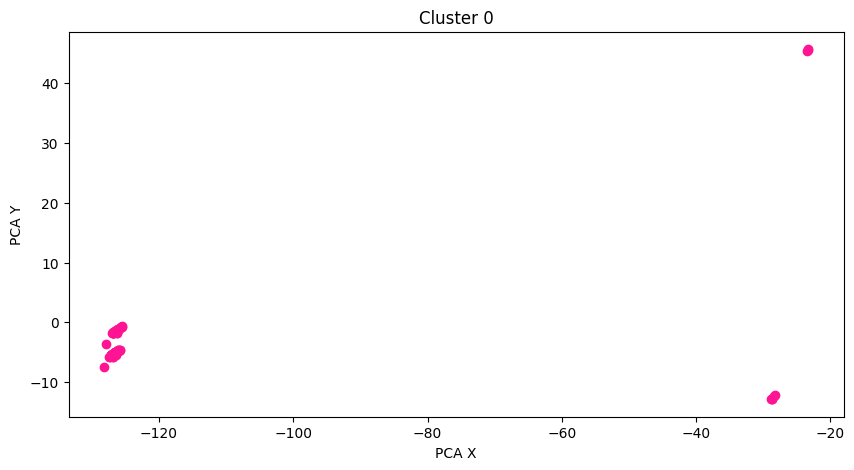

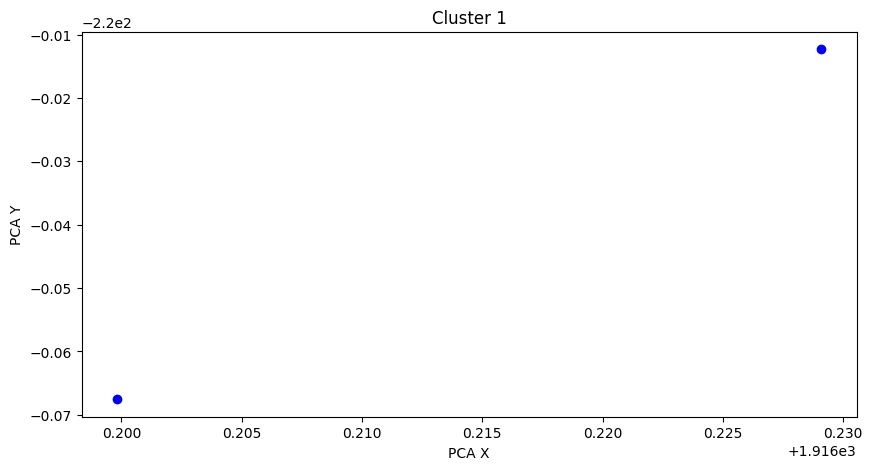

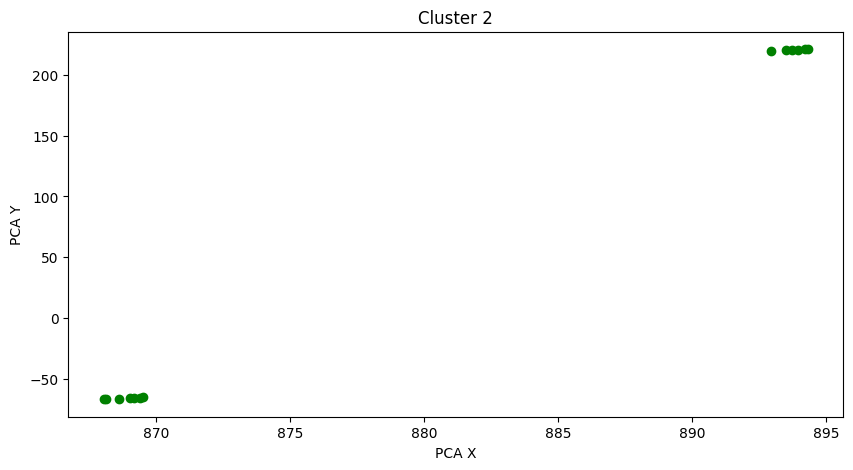

In [28]:
plot_unique_clusters(df_pca, cluster_assignments, colors, 'ProductVendor_Cluster')